In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read results
co_kriging_input = pd.read_csv(
    "../cokriging/exp_co_kriging_input.csv", index_col=0)
co_kriging_output = pd.read_csv(
    "../cokriging/exp_co_kriging_output.csv", index_col=0)
# return back to original directory
# merge input and output
co_kriging_results = pd.merge(
    co_kriging_input, co_kriging_output, left_index=True, right_index=True)
# make normalized_mae and normalized_rmse to be absolute value
co_kriging_results['normalized_mae'] = co_kriging_results['normalized_mae'].abs()
co_kriging_results['normalized_rmse'] = co_kriging_results['normalized_rmse'].abs()
# remove results of"Forrestor_1b" and "Forrestor_1c" and "Forrestor_1a"
co_kriging_results = co_kriging_results[co_kriging_results['problem']
                                        != 'Forrester_1a']
co_kriging_results = co_kriging_results[co_kriging_results['problem']
                                        != 'Forrester_1b']
co_kriging_results = co_kriging_results[co_kriging_results['problem']
                                        != 'Forrester_1c']

# read results for hk
hk_input = pd.read_csv("../hk/exp_hk_input.csv", index_col=0)
hk_output = pd.read_csv("../hk/exp_hk_output.csv", index_col=0)
# merge input and output
hk_results = pd.merge(hk_input, hk_output, left_index=True, right_index=True)
# make normalized_mae and normalized_rmse to be absolute value
hk_results['normalized_mae'] = hk_results['normalized_mae'].abs()
hk_results['normalized_rmse'] = hk_results['normalized_rmse'].abs()
# remove results of "Forrestor_1b" and "Forrestor_1c"
hk_results = hk_results[hk_results['problem'] != 'Forrester_1a']
hk_results = hk_results[hk_results['problem'] != 'Forrester_1b']
hk_results = hk_results[hk_results['problem'] != 'Forrester_1c']


# read results for mf scaled
mf_scaled_input = pd.read_csv(
    "../mf_scaled/exp_mf_scale_input.csv", index_col=0)
mf_scaled_output = pd.read_csv(
    "../mf_scaled/exp_mf_scale_output.csv", index_col=0)
# merge input and output
mf_scaled_results = pd.merge(
    mf_scaled_input, mf_scaled_output, left_index=True, right_index=True)
# make normalized_mae and normalized_rmse to be absolute value
mf_scaled_results['normalized_mae'] = mf_scaled_results['normalized_mae'].abs()
mf_scaled_results['normalized_rmse'] = mf_scaled_results['normalized_rmse'].abs()


# remove results of "Forrestor_1b" and "Forrestor_1c"
mf_scaled_results = mf_scaled_results[mf_scaled_results['problem']
                                      != 'Forrester_1a']
mf_scaled_results = mf_scaled_results[mf_scaled_results['problem']
                                      != 'Forrester_1b']
mf_scaled_results = mf_scaled_results[mf_scaled_results['problem']
                                      != 'Forrester_1c']


# read results for mf-rbf-kriging
mf_rbf_kriging_input = pd.read_csv(
    "../mf_rbf_kriging/exp_mf_rbf_input.csv", index_col=0)
mf_rbf_kriging_output = pd.read_csv(
    "../mf_rbf_kriging/exp_mf_rbf_output.csv", index_col=0)
# merge input and output
mf_rbf_kriging_results = pd.merge(
    mf_rbf_kriging_input, mf_rbf_kriging_output, left_index=True, right_index=True)
# make normalized_mae and normalized_rmse to be absolute value
mf_rbf_kriging_results['normalized_mae'] = mf_rbf_kriging_results['normalized_mae'].abs()
mf_rbf_kriging_results['normalized_rmse'] = mf_rbf_kriging_results['normalized_rmse'].abs()
# remove results of "Forrestor_1b" and "Forrestor_1c"
mf_rbf_kriging_results = mf_rbf_kriging_results[mf_rbf_kriging_results['problem']
                                                != 'Forrester_1a']
mf_rbf_kriging_results = mf_rbf_kriging_results[mf_rbf_kriging_results['problem']
                                                != 'Forrester_1b']
mf_rbf_kriging_results = mf_rbf_kriging_results[mf_rbf_kriging_results['problem']
                                                != 'Forrester_1c']

# load kriging results
kriging_input = pd.read_csv(
    "../../sf_data_scarce_noiseless/exp_kriging_input.csv", index_col=0)
kriging_output = pd.read_csv(
    "../../sf_data_scarce_noiseless/exp_kriging_output.csv", index_col=0)
# merge input and output
kriging_results = pd.merge(
    kriging_input, kriging_output, left_index=True, right_index=True)
# make normalized_mae and normalized_rmse to be absolute value
kriging_results['normalized_mae'] = kriging_results['normalized_mae'].abs()
kriging_results['normalized_rmse'] = kriging_results['normalized_rmse'].abs()
# remove results of "Forrestor_1a"
kriging_results = kriging_results[kriging_results['problem']
                                  != 'Forrester_1a']

In [3]:
mf_rbf_kriging_results.problem.unique()

array(['mf_Bohachevsky', 'mf_Booth', 'mf_Borehole', 'mf_CurrinExp',
       'mf_Hartman3', 'mf_Hartman6', 'mf_Himmelblau', 'mf_Park91A',
       'mf_Park91B', 'mf_Sixhump'], dtype=object)

/tmp/ipykernel_10280/4124648823.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annotations_mean = pivot_table["mean"].applymap(
/tmp/ipykernel_10280/4124648823.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table["std"].applymap("{:.2f}".format).astype(str).values


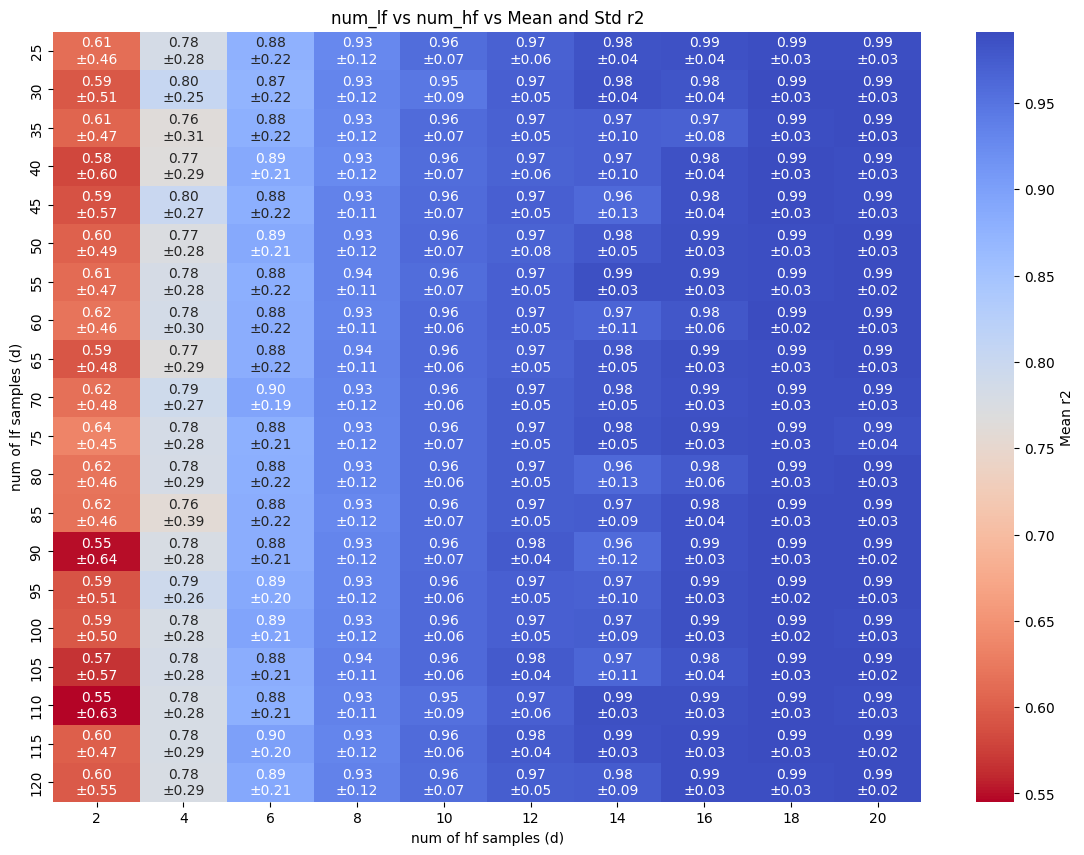

In [4]:
# Create a pivot table for num_lf, num_hf, mean, and std of r2
pivot_table = co_kriging_results.pivot_table(
    values="r2", index="num_lf", columns="num_hf", aggfunc=["mean", "std"]
)

# Create a custom annotation array with both mean and std values
annotations_mean = pivot_table["mean"].applymap(
    "{:.2f}".format).astype(str).values
annotations_std = "±" + \
    pivot_table["std"].applymap("{:.2f}".format).astype(str).values

# Combine annotations
annotations_combined = [
    f"{m}\n{s}" for m, s in zip(annotations_mean.flatten(), annotations_std.flatten())
]
annotations_combined = np.array(
    annotations_combined).reshape(annotations_mean.shape)

# Create a combined heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    pivot_table["mean"],
    annot=annotations_combined,
    fmt="",
    cmap="coolwarm_r",
    cbar_kws={"label": "Mean r2"},
)
plt.title("num_lf vs num_hf vs Mean and Std r2")
plt.xlabel("num of hf samples (d)")
plt.ylabel("num of lf samples (d)")
plt.show()

/tmp/ipykernel_10280/1010100788.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annotations_mean = pivot_table["mean"].applymap(
/tmp/ipykernel_10280/1010100788.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table["std"].applymap("{:.2f}".format).astype(str).values


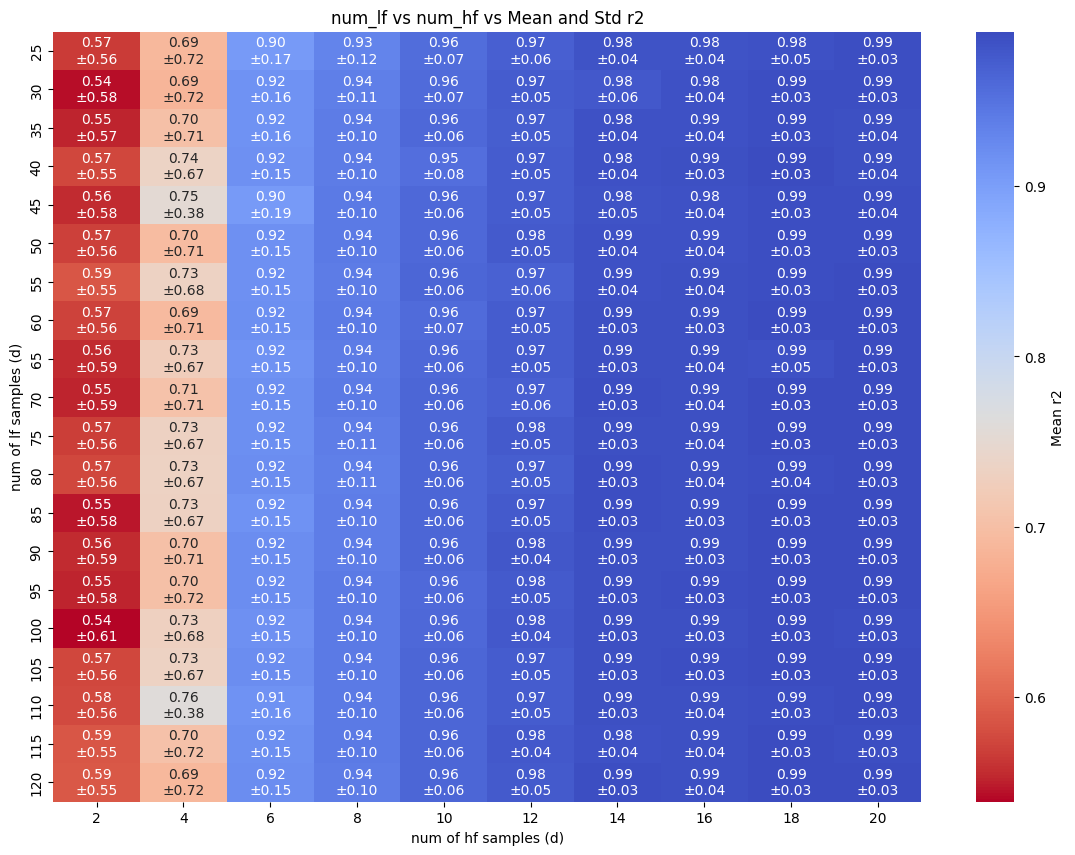

In [5]:
# Create a pivot table for num_lf, num_hf, mean, and std of r2
pivot_table = hk_results.pivot_table(
    values="r2", index="num_lf", columns="num_hf", aggfunc=["mean", "std"]
)

# Create a custom annotation array with both mean and std values
annotations_mean = pivot_table["mean"].applymap(
    "{:.2f}".format).astype(str).values
annotations_std = "±" + \
    pivot_table["std"].applymap("{:.2f}".format).astype(str).values

# Combine annotations
annotations_combined = [
    f"{m}\n{s}" for m, s in zip(annotations_mean.flatten(), annotations_std.flatten())
]
annotations_combined = np.array(
    annotations_combined).reshape(annotations_mean.shape)

# Create a combined heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    pivot_table["mean"],
    annot=annotations_combined,
    fmt="",
    cmap="coolwarm_r",
    cbar_kws={"label": "Mean r2"},
)
plt.title("num_lf vs num_hf vs Mean and Std r2")
plt.xlabel("num of hf samples (d)")
plt.ylabel("num of lf samples (d)")
plt.show()

/tmp/ipykernel_10280/375722642.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annotations_mean = pivot_table["mean"].applymap(
/tmp/ipykernel_10280/375722642.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table["std"].applymap("{:.2f}".format).astype(str).values


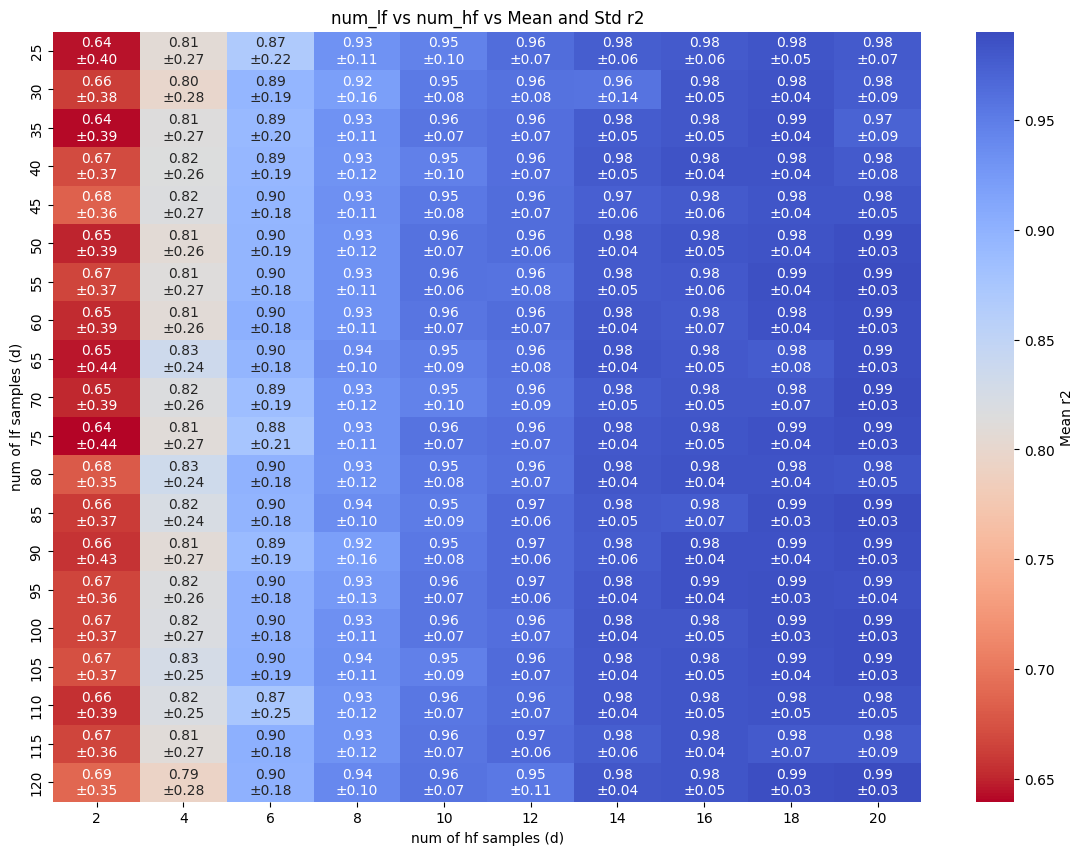

In [6]:
# Create a pivot table for num_lf, num_hf, mean, and std of r2
pivot_table = mf_scaled_results.pivot_table(
    values="r2", index="num_lf", columns="num_hf", aggfunc=["mean", "std"]
)

# Create a custom annotation array with both mean and std values
annotations_mean = pivot_table["mean"].applymap(
    "{:.2f}".format).astype(str).values
annotations_std = "±" + \
    pivot_table["std"].applymap("{:.2f}".format).astype(str).values

# Combine annotations
annotations_combined = [
    f"{m}\n{s}" for m, s in zip(annotations_mean.flatten(), annotations_std.flatten())
]
annotations_combined = np.array(
    annotations_combined).reshape(annotations_mean.shape)

# Create a combined heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    pivot_table["mean"],
    annot=annotations_combined,
    fmt="",
    cmap="coolwarm_r",
    cbar_kws={"label": "Mean r2"},
)
plt.title("num_lf vs num_hf vs Mean and Std r2")
plt.xlabel("num of hf samples (d)")
plt.ylabel("num of lf samples (d)")
plt.show()

/tmp/ipykernel_10280/2336356561.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annotations_mean = pivot_table["mean"].applymap(
/tmp/ipykernel_10280/2336356561.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table["std"].applymap("{:.2f}".format).astype(str).values


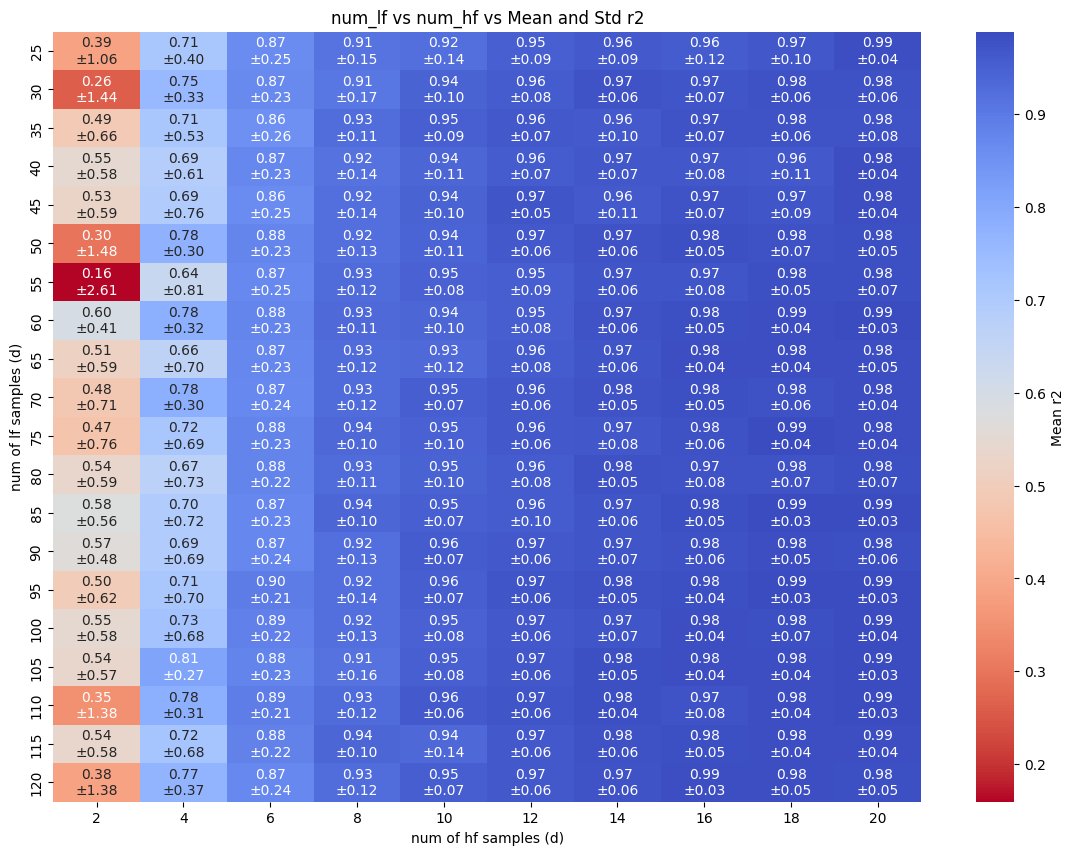

In [7]:
# Create a pivot table for num_lf, num_hf, mean, and std of r2
pivot_table = mf_rbf_kriging_results.pivot_table(
    values="r2", index="num_lf", columns="num_hf", aggfunc=["mean", "std"]
)

# Create a custom annotation array with both mean and std values
annotations_mean = pivot_table["mean"].applymap(
    "{:.2f}".format).astype(str).values
annotations_std = "±" + \
    pivot_table["std"].applymap("{:.2f}".format).astype(str).values

# Combine annotations
annotations_combined = [
    f"{m}\n{s}" for m, s in zip(annotations_mean.flatten(), annotations_std.flatten())
]
annotations_combined = np.array(
    annotations_combined).reshape(annotations_mean.shape)

# Create a combined heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    pivot_table["mean"],
    annot=annotations_combined,
    fmt="",
    cmap="coolwarm_r",
    cbar_kws={"label": "Mean r2"},
)
plt.title("num_lf vs num_hf vs Mean and Std r2")
plt.xlabel("num of hf samples (d)")
plt.ylabel("num of lf samples (d)")
plt.show()

In [8]:
# plot the heat plot between mf_rbf_kriging and hk
# create a new pandas dataframe with difference between mf_rbf_kriging and hk
mf_rbf_kriging_hk_diff = mf_rbf_kriging_results.copy()
mf_rbf_kriging_hk_diff["r2"] = mf_rbf_kriging_hk_diff["r2"] - \
    hk_results["r2"].values

mf_rbf_kriging_hk_diff

,method,num_hf,num_lf,problem,seed,progress,normalized_mae,normalized_rmse,r2,cpu_time
0,mf_rbf,2,25,mf_Bohachevsky,1,finished,1.233443,0.420399,-0.001800,0.647418
1,mf_rbf,4,25,mf_Bohachevsky,1,finished,1.208830,0.387603,-0.348133,0.439203
2,mf_rbf,6,25,mf_Bohachevsky,1,finished,0.338228,0.056848,-0.000494,0.597852
3,mf_rbf,8,25,mf_Bohachevsky,1,finished,0.200023,0.040843,-0.000120,0.494892
4,mf_rbf,10,25,mf_Bohachevsky,1,finished,0.045301,0.017693,0.000017,0.827204
...,...,...,...,...,...,...,...,...,...,...
9995,mf_rbf,12,120,mf_Sixhump,5,finished,0.923295,0.177686,-0.016674,1.313283
9996,mf_rbf,14,120,mf_Sixhump,5,finished,0.033815,0.005699,0.000010,0.972567
9997,mf_rbf,16,120,mf_Sixhump,5,finished,0.499550,0.152840,-0.012435,2.737018
9998,mf_rbf,18,120,mf_Sixhump,5,finished,0.470300,0.100203,-0.005349,1.468807


/tmp/ipykernel_10280/3020512375.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annotations_mean = pivot_table["mean"].applymap(
/tmp/ipykernel_10280/3020512375.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table["std"].applymap("{:.2f}".format).astype(str).values


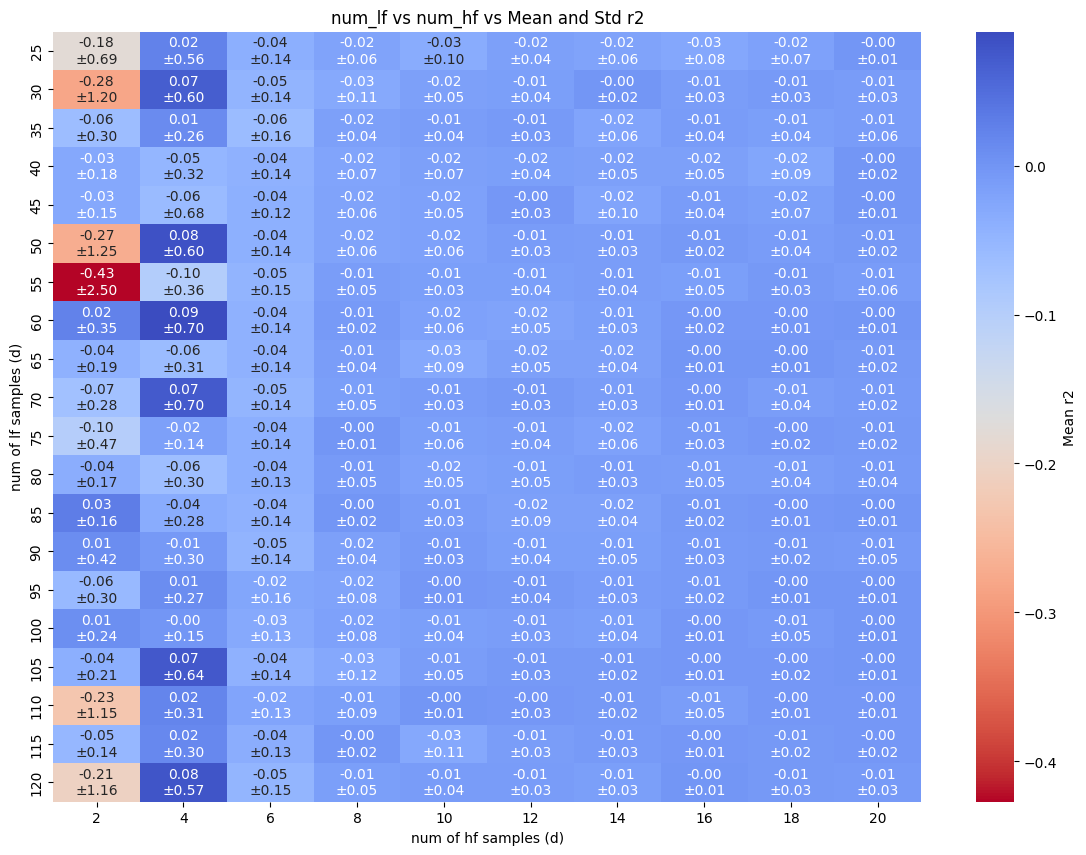

In [9]:

pivot_table = mf_rbf_kriging_hk_diff.pivot_table(
    values="r2", index="num_lf", columns="num_hf", aggfunc=["mean", "std"]
)

# Create a custom annotation array with both mean and std values
annotations_mean = pivot_table["mean"].applymap(
    "{:.2f}".format).astype(str).values
annotations_std = "±" + \
    pivot_table["std"].applymap("{:.2f}".format).astype(str).values

# Combine annotations
annotations_combined = [
    f"{m}\n{s}" for m, s in zip(annotations_mean.flatten(), annotations_std.flatten())
]
annotations_combined = np.array(
    annotations_combined).reshape(annotations_mean.shape)

# Create a combined heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    pivot_table["mean"],
    annot=annotations_combined,
    fmt="",
    cmap="coolwarm_r",
    cbar_kws={"label": "Mean r2"},
)
plt.title("num_lf vs num_hf vs Mean and Std r2")
plt.xlabel("num of hf samples (d)")
plt.ylabel("num of lf samples (d)")
plt.show()

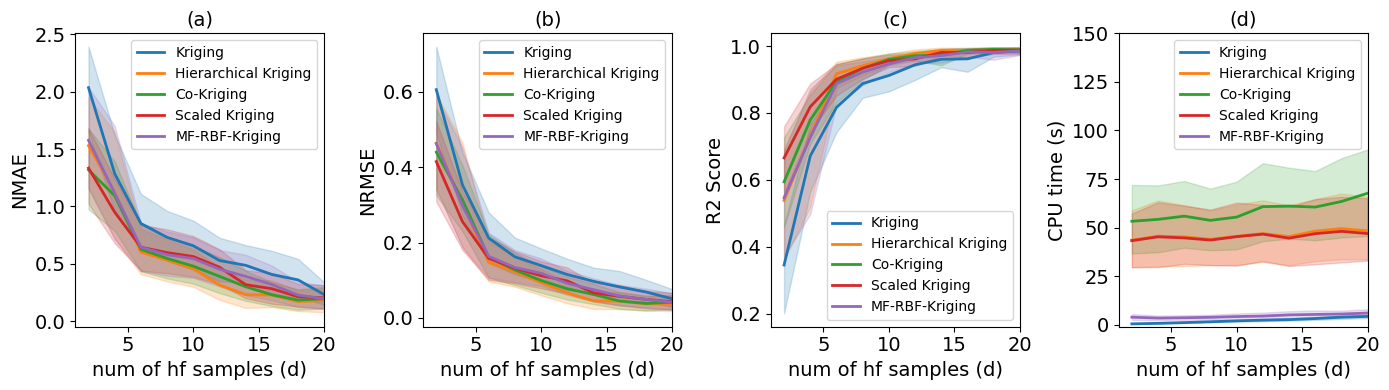

In [10]:

# get the results for 120 samples
hk_results_120 = hk_results[hk_results["num_lf"] == 100]
ck_results_120 = co_kriging_results[co_kriging_results["num_lf"] == 100]
scaled_results_120 = mf_scaled_results[mf_scaled_results["num_lf"] == 100]
mf_rbf_results_120 = mf_rbf_kriging_results[mf_rbf_kriging_results["num_lf"] == 100]


# Create subplots for each metric
fig, axes = plt.subplots(1, 4, figsize=(14, 4))

# Plotting mae
sns.lineplot(data=kriging_results, x="num_sample",
             y="normalized_mae", label="Kriging", linewidth=2, ax=axes[0])
sns.lineplot(data=hk_results_120, x="num_hf",
             y="normalized_mae", label="Hierarchical Kriging", linewidth=2, ax=axes[0])
sns.lineplot(data=ck_results_120, x="num_hf",
             y="normalized_mae", label="Co-Kriging", linewidth=2, ax=axes[0])
sns.lineplot(data=scaled_results_120, x="num_hf",
             y="normalized_mae", label="Scaled Kriging", linewidth=2, ax=axes[0])
sns.lineplot(data=mf_rbf_results_120, x="num_hf",
             y="normalized_mae", label="MF-RBF-Kriging", linewidth=2, ax=axes[0])
axes[0].set_xlim([1, 20])
axes[0].set_title("(a)", fontsize=14)
axes[0].set_xlabel("num of hf samples (d)", fontsize=14)
axes[0].set_ylabel("NMAE", fontsize=14)

# Plotting rmse
sns.lineplot(data=kriging_results, x="num_sample",
             y="normalized_rmse", label="Kriging", linewidth=2, ax=axes[1])
sns.lineplot(data=hk_results_120, x="num_hf",
             y="normalized_rmse", label="Hierarchical Kriging", linewidth=2, ax=axes[1])
sns.lineplot(data=ck_results_120, x="num_hf",
             y="normalized_rmse", label="Co-Kriging", linewidth=2, ax=axes[1])
sns.lineplot(data=scaled_results_120, x="num_hf",
             y="normalized_rmse", label="Scaled Kriging", linewidth=2, ax=axes[1])
sns.lineplot(data=mf_rbf_results_120, x="num_hf",
             y="normalized_rmse", label="MF-RBF-Kriging", linewidth=2, ax=axes[1])
axes[1].set_title("(b)", fontsize=14)
axes[1].set_xlabel(r"num of hf samples (d)", fontsize=14)
axes[1].set_ylabel("NRMSE", fontsize=14)
axes[1].set_xlim([1, 20])

# Plotting r2
sns.lineplot(data=kriging_results, x="num_sample", linewidth=2,
             y="r2", label="Kriging", ax=axes[2])
sns.lineplot(data=hk_results_120, x="num_hf", y="r2", linewidth=2,
             label="Hierarchical Kriging", ax=axes[2])
sns.lineplot(data=ck_results_120, x="num_hf", linewidth=2,
             y="r2", label="Co-Kriging", ax=axes[2])
sns.lineplot(data=scaled_results_120, x="num_hf", linewidth=2,
             y="r2", label="Scaled Kriging", ax=axes[2])
sns.lineplot(data=mf_rbf_results_120, x="num_hf", linewidth=2,
             y="r2", label="MF-RBF-Kriging", ax=axes[2])
axes[2].set_title("(c)", fontsize=14)
axes[2].set_xlabel("num of hf samples (d)", fontsize=14)
axes[2].set_ylabel("R2 Score", fontsize=14)
axes[2].legend(loc='lower right')
axes[2].set_xlim([1, 20])
# Plotting cpu time
sns.lineplot(data=kriging_results, x="num_sample", linewidth=2,
             y="cpu_time", label="Kriging", ax=axes[3])
sns.lineplot(data=hk_results_120, x="num_hf", linewidth=2,
             y="cpu_time", label="Hierarchical Kriging", ax=axes[3])
sns.lineplot(data=ck_results_120, x="num_hf", linewidth=2,
             y="cpu_time", label="Co-Kriging", ax=axes[3])
sns.lineplot(data=scaled_results_120, x="num_hf", linewidth=2,
             y="cpu_time", label="Scaled Kriging", ax=axes[3])
sns.lineplot(data=mf_rbf_results_120, x="num_hf", linewidth=2,
             y="cpu_time", label="MF-RBF-Kriging", ax=axes[3])
axes[3].set_ylim([-1, 150])
axes[3].set_title("(d)", fontsize=14)
axes[3].set_xlabel("num of hf samples (d)", fontsize=14)
axes[3].set_ylabel("CPU time (s)", fontsize=14)
axes[3].set_xlim([1, 20])
# set font size
font_size = 14
axes[0].tick_params(labelsize=font_size)
axes[1].tick_params(labelsize=font_size)
axes[2].tick_params(labelsize=font_size)
axes[3].tick_params(labelsize=font_size)

# Adjust layout
plt.tight_layout()
plt.savefig("comparison_at_100lf_samples.png", dpi=300)
plt.savefig("comparison_at_100lf_samples.pdf", dpi=300)
plt.savefig("comparison_at_100lf_samples.svg", dpi=300)

plt.show()

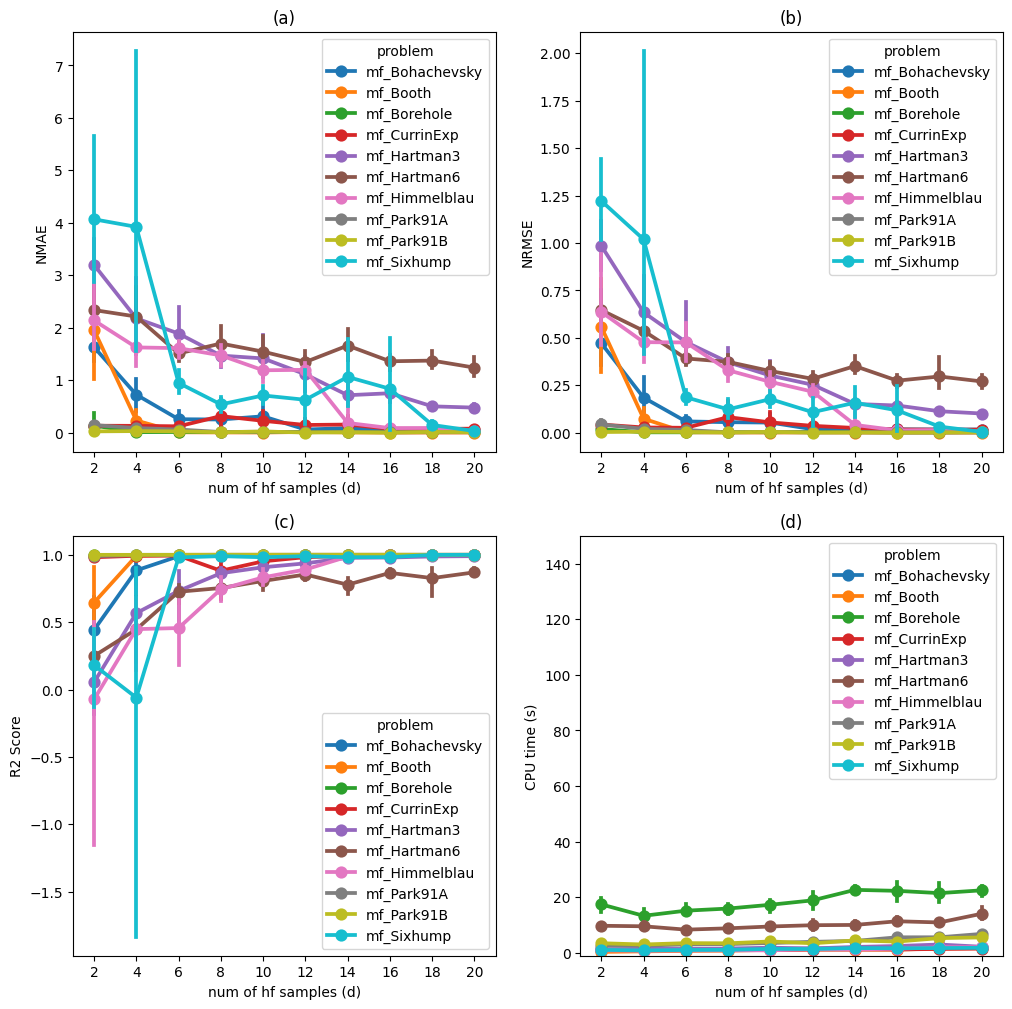

In [11]:

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
sns.pointplot(x="num_hf", y="normalized_mae", hue="problem",
              data=mf_rbf_results_120, ax=axes[0, 0])
sns.pointplot(x="num_hf", y="normalized_rmse", hue="problem",
                data=mf_rbf_results_120, ax=axes[0, 1])
sns.pointplot(x="num_hf", y="r2", hue="problem",
                data=mf_rbf_results_120, ax=axes[1, 0])
sns.pointplot(x="num_hf", y="cpu_time", hue="problem",
                data=mf_rbf_results_120, ax=axes[1, 1])
axes[0, 0].set_title("(a)")
axes[0, 1].set_title("(b)")
axes[1, 0].set_title("(c)")
axes[1, 1].set_title("(d)")
axes[0, 0].set_xlabel("num of hf samples (d)")
axes[0, 0].set_ylabel("NMAE")
axes[0, 1].set_xlabel("num of hf samples (d)")
axes[0, 1].set_ylabel("NRMSE")
axes[1, 0].set_xlabel("num of hf samples (d)")
axes[1, 0].set_ylabel("R2 Score")
axes[1, 1].set_xlabel("num of hf samples (d)")
axes[1, 1].set_ylabel("CPU time (s)")
axes[1, 1].set_ylim([-1, 150])
plt.show()